In [39]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Downloading Dataset

In [40]:
#loading linear interpolation dataset 
train_data = pd.read_csv('train_models_linear_interp.csv')
test_data = pd.read_csv('test_models_linear_interp.csv')

In [41]:
train_data

,subject,age_group,brach_t_0,brach_t_1,brach_t_2,brach_t_3,brach_t_4,brach_t_5,brach_t_6,brach_t_7,...,aorta_t_326,aorta_t_327,aorta_t_328,aorta_t_329,aorta_t_330,aorta_t_331,aorta_t_332,aorta_t_333,aorta_t_334,aorta_t_335
0,0,0,62.564351,53.747516,56.925071,58.866651,57.742082,58.623726,59.505370,60.387014,...,75.389672,77.975023,72.213031,80.702144,75.202017,76.878189,75.906016,78.648127,71.645146,73.536448
1,1,0,75.088914,76.218639,77.348365,78.478090,79.607816,80.737541,81.867267,82.996992,...,89.087360,95.670739,91.242212,93.323301,90.106979,93.491525,90.860328,91.587882,91.098254,90.970382
2,2,1,74.000363,71.772635,73.136652,72.148745,73.149230,73.408397,79.258698,74.625452,...,85.012398,81.802379,81.542184,86.691045,80.115917,81.133328,84.461758,76.700464,80.231444,86.387109
3,5,3,79.105321,75.754364,77.246761,69.883390,81.779215,80.695538,79.775038,82.935343,...,82.820390,79.766236,77.329335,76.836107,79.570856,76.937290,75.432001,83.340827,83.340925,73.351726
4,6,0,79.110084,79.591450,79.144459,79.667108,85.742077,81.860715,83.452876,81.287334,...,83.791776,91.234037,87.624281,85.804136,85.073875,86.804619,90.799198,82.969781,89.931407,85.142106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,3492,0,73.831052,75.415097,78.675700,78.524869,78.299935,76.292582,74.494976,76.295582,...,77.741995,85.248036,82.195230,84.813663,81.172961,81.768571,76.554947,79.906829,79.168791,83.015978
2795,3494,0,79.848469,78.441750,83.511748,83.218598,78.115557,82.282276,78.756526,77.185545,...,82.784652,93.637826,88.215309,91.333151,93.850324,90.235139,95.728385,96.140856,94.733477,95.680955
2796,3496,1,72.758663,79.325892,74.629825,76.051489,72.978562,81.327702,76.539977,77.883857,...,82.784967,82.622716,82.460465,82.298215,82.135964,81.973713,81.811462,81.649211,81.486960,81.324709
2797,3497,3,73.337806,77.200302,75.938591,74.552359,77.648653,77.753417,79.544534,82.831220,...,83.234357,78.916712,82.262023,77.188867,81.450046,80.010225,77.851838,81.744587,74.059119,75.127591


In [42]:
# checking null values
train_data.isnull().sum()

subject        0
age_group      0
brach_t_0      0
brach_t_1      0
brach_t_2      0
              ..
aorta_t_331    0
aorta_t_332    0
aorta_t_333    0
aorta_t_334    0
aorta_t_335    0
Length: 674, dtype: int64

In [43]:
train_data['age_group'].unique()

array([0, 1, 3, 5, 2, 4])

### Viewing distribution of data among different age groups

In [44]:
train_data['age_group'].value_counts()

2    474
5    466
3    466
1    466
0    466
4    461
Name: age_group, dtype: int64

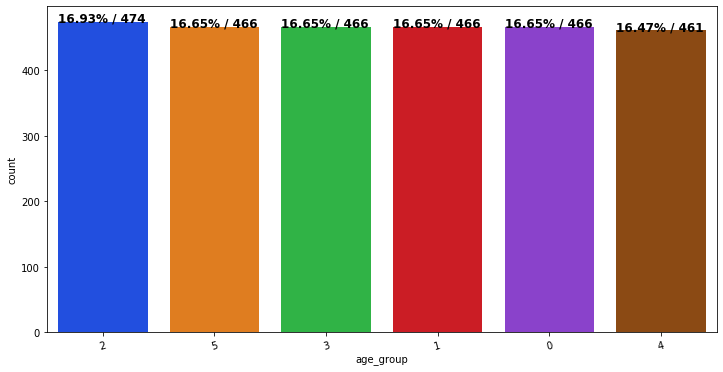

In [45]:
percentages = [count / train_data.shape[0] * 100 for count in train_data['age_group'].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=train_data['age_group'],
    ax=ax,
    palette="bright",
    order=train_data['age_group'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    train_data['age_group'].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')

#### Similar distribution amount in different age groups.

In [46]:
df_0 = train_data[train_data['age_group'] == 0]
df_1 = train_data[train_data['age_group'] == 1]
df_2 = train_data[train_data['age_group'] == 2]
df_3 = train_data[train_data['age_group'] == 3]
df_4 = train_data[train_data['age_group'] == 4]
df_5 = train_data[train_data['age_group'] == 5]

In [47]:
train_df = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5])

In [48]:
train_df

,subject,age_group,brach_t_0,brach_t_1,brach_t_2,brach_t_3,brach_t_4,brach_t_5,brach_t_6,brach_t_7,...,aorta_t_326,aorta_t_327,aorta_t_328,aorta_t_329,aorta_t_330,aorta_t_331,aorta_t_332,aorta_t_333,aorta_t_334,aorta_t_335
0,0,0,62.564351,53.747516,56.925071,58.866651,57.742082,58.623726,59.505370,60.387014,...,75.389672,77.975023,72.213031,80.702144,75.202017,76.878189,75.906016,78.648127,71.645146,73.536448
1,1,0,75.088914,76.218639,77.348365,78.478090,79.607816,80.737541,81.867267,82.996992,...,89.087360,95.670739,91.242212,93.323301,90.106979,93.491525,90.860328,91.587882,91.098254,90.970382
4,6,0,79.110084,79.591450,79.144459,79.667108,85.742077,81.860715,83.452876,81.287334,...,83.791776,91.234037,87.624281,85.804136,85.073875,86.804619,90.799198,82.969781,89.931407,85.142106
6,8,0,76.725944,74.883810,79.682331,73.669772,71.994015,71.374981,78.810849,79.427026,...,85.435805,83.077085,82.789703,77.332004,78.945598,83.122979,82.526277,78.785605,76.249369,79.181702
19,23,0,73.944881,82.908147,73.964480,77.314000,77.175363,77.754981,75.213794,79.655527,...,93.385234,94.175912,91.877728,92.179310,92.865277,89.246450,91.123432,95.570748,93.186086,91.302837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,3415,5,73.953451,68.437283,71.101227,81.468621,76.504671,80.387189,79.759792,84.278965,...,91.037359,90.959268,90.881177,90.803086,90.724995,90.646904,90.568812,90.490721,90.412630,90.334539
2765,3448,5,80.294496,81.148682,82.002869,82.857055,83.711242,84.565428,85.419615,86.273801,...,79.938321,81.893877,86.818609,85.336495,81.893898,85.029824,82.479948,86.742301,76.324307,83.566605
2766,3449,5,69.121993,69.101078,63.127660,67.135448,64.625607,70.833419,69.357294,66.815343,...,83.789209,80.373504,79.315987,78.348828,76.480068,80.972486,82.612849,82.021045,80.626501,75.430242
2767,3451,5,70.354696,73.812782,69.683432,75.284077,71.412673,75.192207,72.978031,75.195402,...,77.323392,86.042894,86.901764,85.918385,78.644282,81.808225,84.982972,80.220004,85.150620,82.517445


In [49]:
target_train = train_df['age_group']
target_test = test_data['age_group']

In [50]:
target_train.unique()

array([0, 1, 2, 3, 4, 5])

In [51]:
# converting category labels w/ one hot encoding (could also just be defined as int)
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

In [52]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [53]:
y_test = to_categorical(target_test)

In [54]:
X_train = train_df.iloc[:, 2:].values
X_test = test_data.iloc[:, 2:].values

In [55]:
X_train

array([[62.56435145, 53.74751633, 56.92507148, ..., 78.64812672,
        71.64514607, 73.53644807],
       [75.08891352, 76.21863902, 77.34836452, ..., 91.58788168,
        91.09825426, 90.97038162],
       [79.11008414, 79.59145024, 79.14445894, ..., 82.96978137,
        89.93140722, 85.14210631],
       ...,
       [69.12199284, 69.10107814, 63.12765967, ..., 82.0210454 ,
        80.62650059, 75.43024178],
       [70.35469604, 73.81278173, 69.6834317 , ..., 80.22000384,
        85.15061964, 82.51744473],
       [73.68820197, 75.11027485, 76.53234772, ..., 89.2445297 ,
        89.12228503, 89.00004036]])

In [56]:
X_train.shape

(2799, 672)

### Need to reshape data to fit into model

In [57]:
X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
X_test = X_test.reshape(len(X_test),X_test.shape[1],1)

In [58]:
X_train.shape

(2799, 672, 1)

In [59]:
X_test.shape

(700, 672, 1)

In [60]:
from keras.models import Sequential
from keras.layers import Dense # for fully connected layers dense will be used
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# avoid overfitting by normalizing the samples
from keras.layers.normalization import BatchNormalization

In [61]:
def build_model():
    model = Sequential()
    
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (672, 1))) #we pass individual values hence not 100000,187,1
    
    # Normalization to avoid overfitting
    model.add(BatchNormalization())
    
    # Pooling 
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    # Flatten 
    model.add(Flatten())

    # Fully connected layer
    # input layer
    model.add(Dense(units = 64, activation='relu'))
    
    # Hidden Layer
    model.add(Dense(units = 64, activation='relu'))
    
    # Output Layer
    model.add(Dense(units = 6, activation='softmax'))

    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [62]:
model = build_model()

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 672, 64)           448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 672, 64)           256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 336, 64)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 336, 64)           24640     
_________________________________________________________________
batch_normalization_4 (Batch (None, 336, 64)           256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 168, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 168, 64)          

In [64]:
X_test.shape

(700, 672, 1)

In [65]:
y_test.shape

(700, 6)

In [66]:
X_train.shape

(2799, 672, 1)

In [67]:
y_train.shape

(2799, 6)

In [68]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/25
88/88 [==============================] - 6s 64ms/step - loss: 1.6170 - accuracy: 0.2997 - val_loss: 11.7761 - val_accuracy: 0.1643
Epoch 2/25
88/88 [==============================] - 6s 64ms/step - loss: 1.3513 - accuracy: 0.3834 - val_loss: 1.7836 - val_accuracy: 0.2714
Epoch 3/25
88/88 [==============================] - 5s 62ms/step - loss: 1.2430 - accuracy: 0.4277 - val_loss: 1.5290 - val_accuracy: 0.3343
Epoch 4/25
88/88 [==============================] - 5s 62ms/step - loss: 1.2160 - accuracy: 0.4366 - val_loss: 1.4017 - val_accuracy: 0.3800
Epoch 5/25
88/88 [==============================] - 6s 63ms/step - loss: 1.2003 - accuracy: 0.4530 - val_loss: 1.5822 - val_accuracy: 0.3886
Epoch 6/25
88/88 [==============================] - 6s 64ms/step - loss: 1.1146 - accuracy: 0.4784 - val_loss: 1.2818 - val_accuracy: 0.4643
Epoch 7/25
88/88 [==============================] - 6s 63ms/step - loss: 1.0738 - accuracy: 0.5020 - val_loss: 1.4259 - val_accuracy: 0.4157
Epoch 8/25
8

In [69]:
# evaluate test data
model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 9ms/step - loss: 1.6047 - accuracy: 0.4357


[1.6047260761260986, 0.4357142746448517]

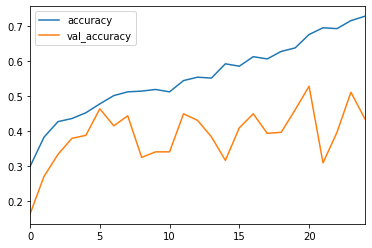

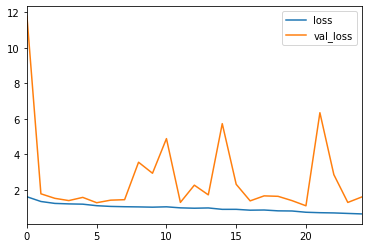

In [70]:
# converting history to dataframe to view accuracy performance
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [71]:
# Make Prediction
predict = model.predict(X_test)

In [72]:
predict

array([[1.14263894e-05, 1.30721601e-03, 8.32814425e-02, 5.89782476e-01,
        2.76904106e-01, 4.87132818e-02],
       [9.08778608e-01, 9.01027769e-02, 2.48220400e-04, 8.41002737e-04,
        2.37746681e-05, 5.77591072e-06],
       [1.85090830e-04, 9.33351144e-02, 2.14983195e-01, 5.97525358e-01,
        9.30349007e-02, 9.36297176e-04],
       ...,
       [8.11876889e-05, 2.71885446e-03, 3.67240250e-01, 4.61271971e-01,
        1.62658706e-01, 6.02906384e-03],
       [6.29913899e-11, 1.13206772e-06, 8.19472689e-03, 4.38600600e-01,
        5.47752440e-01, 5.45116048e-03],
       [3.57499863e-11, 4.70865480e-09, 5.66214556e-04, 1.06073655e-02,
        2.04615742e-01, 7.84210742e-01]], dtype=float32)

In [73]:
#for i in range(10):
# print(X_test[i], predict[i])

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
yhat = np.argmax(predict, axis = 1)
confusion_matrix(np.argmax(y_test, axis = 1), yhat)

array([[51, 41, 22,  2,  0,  0],
       [ 9, 51, 38, 19,  0,  0],
       [ 3, 16, 47, 46,  2,  5],
       [ 0,  5, 22, 60, 20,  9],
       [ 0,  2,  2, 53, 38, 20],
       [ 2,  0,  0,  9, 48, 58]])

In [75]:
#plt.figure(figsize=(8,6))
#sns.heatmap(confusion_matrix(np.argmax(y_test, axis =1), yhat), annot = True, fmt = '0.0f', cmap= 'RdPu')

In [76]:
print(classification_report(np.argmax(y_test, axis=1), yhat))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56       116
           1       0.44      0.44      0.44       117
           2       0.36      0.39      0.38       119
           3       0.32      0.52      0.39       116
           4       0.35      0.33      0.34       115
           5       0.63      0.50      0.56       117

    accuracy                           0.44       700
   macro avg       0.48      0.44      0.44       700
weighted avg       0.48      0.44      0.44       700

